# A very good introduction to pre-process steps:
https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

## Import the required libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
%matplotlib inline

## Read the train folder and extract the continues columns

In [2]:
trainFile = 'house-prices-advanced-regression-techniques/train.csv'
trainDF = pd.read_csv(trainFile)

trainDF.drop(['Id'], axis=1, inplace=True)

descreteVars = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 
                'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 
                'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
                'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 
                'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
                'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
                'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
                'SaleCondition']

# , 'BsmtHalfBath', 'OverallCond', 'BsmtFullBath', 'FullBath', 'OverallQual', 'KitchenAbvGr',
#                 'BedroomAbvGr', 'GarageCars', 'Fireplaces', 'TotRmsAbvGrd', 'HalfBath']

resultVar = ['SalePrice']

continuesVars = list(set(list(trainDF)) - set(descreteVars) - set(resultVar))

print('trainDF: ')
print(list(trainDF))
print('descreteVars: ')
print(descreteVars)
print('continuesVars: ')
print(continuesVars)

continuesDF = trainDF[continuesVars]
desdcretDF = trainDF[descreteVars]
resultCol = trainDF[resultVar]

trainDF: 
['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Poo

In [3]:
print('continuesDF description: ')
print(continuesDF.describe())


continuesDF description: 
       TotRmsAbvGrd        LotArea   BsmtFinSF1       MoSold     1stFlrSF  \
count   1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean       6.517808   10516.828082   443.639726     6.321918  1162.626712   
std        1.625393    9981.264932   456.098091     2.703626   386.587738   
min        2.000000    1300.000000     0.000000     1.000000   334.000000   
25%        5.000000    7553.500000     0.000000     5.000000   882.000000   
50%        6.000000    9478.500000   383.500000     6.000000  1087.000000   
75%        7.000000   11601.500000   712.250000     8.000000  1391.250000   
max       14.000000  215245.000000  5644.000000    12.000000  4692.000000   

       GarageYrBlt   MasVnrArea  BsmtFullBath    3SsnPorch    BsmtUnfSF  ...  \
count  1379.000000  1452.000000   1460.000000  1460.000000  1460.000000  ...   
mean   1978.506164   103.685262      0.425342     3.409589   567.240411  ...   
std      24.689725   181.066207      0.5

In [4]:
listOFContinuesCols = list(continuesDF)
print(listOFContinuesCols)
print('-------------------------------')

for continuesCol in continuesDF:
    print(continuesCol)
    tempCol = continuesDF[continuesCol]
    colMax = tempCol.max()
    colMin = tempCol.min()
    colDelta = colMax - colMin
    print('Max: ' + str(colMax))
    print('Min: ' + str(colMin))
    print('Delta: ' + str(colDelta))
    print('-------------------------------')

['TotRmsAbvGrd', 'LotArea', 'BsmtFinSF1', 'MoSold', '1stFlrSF', 'GarageYrBlt', 'MasVnrArea', 'BsmtFullBath', '3SsnPorch', 'BsmtUnfSF', 'ScreenPorch', 'YearRemodAdd', 'YearBuilt', 'MiscVal', 'GarageCars', 'OpenPorchSF', 'WoodDeckSF', 'Fireplaces', 'EnclosedPorch', 'LowQualFinSF', 'BsmtHalfBath', 'OverallCond', 'PoolArea', 'GarageArea', 'GrLivArea', 'FullBath', 'HalfBath', 'LotFrontage', 'TotalBsmtSF', 'YrSold', '2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF2', 'KitchenAbvGr', 'OverallQual']
-------------------------------
TotRmsAbvGrd
Max: 14
Min: 2
Delta: 12
-------------------------------
LotArea
Max: 215245
Min: 1300
Delta: 213945
-------------------------------
BsmtFinSF1
Max: 5644
Min: 0
Delta: 5644
-------------------------------
MoSold
Max: 12
Min: 1
Delta: 11
-------------------------------
1stFlrSF
Max: 4692
Min: 334
Delta: 4358
-------------------------------
GarageYrBlt
Max: 2010.0
Min: 1900.0
Delta: 110.0
-------------------------------
MasVnrArea
Max: 1600.0
Min: 0.0
Delta: 1600.0


TotRmsAbvGrd
Max: 14
Min: 2
Delta: 12


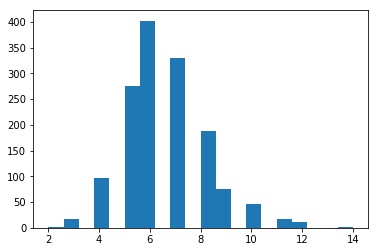

----------------------
LotArea
Max: 215245
Min: 1300
Delta: 213945


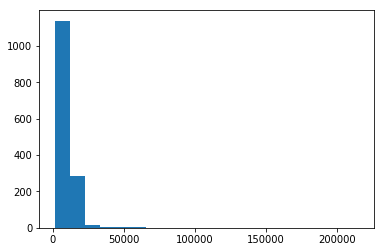

----------------------
BsmtFinSF1
Max: 5644
Min: 0
Delta: 5644


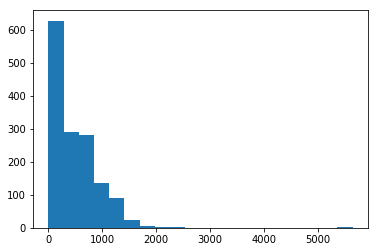

----------------------
MoSold
Max: 12
Min: 1
Delta: 11


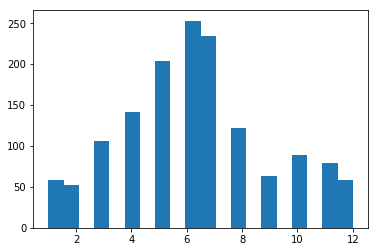

----------------------
1stFlrSF
Max: 4692
Min: 334
Delta: 4358


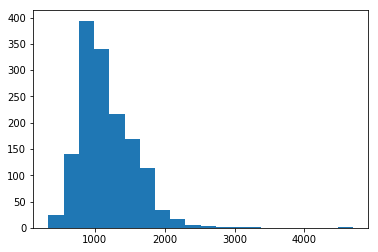

----------------------
GarageYrBlt
Max: 2010.0
Min: 1900.0
Delta: 110.0


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


ValueError: max must be larger than min in range parameter.

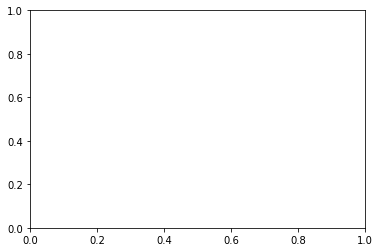

In [6]:
colIndex=0
binwidth = 5

nrows = len(listOFContinuesCols)
ncols = 1

for continuesCol in continuesDF:
    print(continuesCol)
    tempCol = continuesDF[continuesCol]#.dropna()
    colMax = tempCol.max()
    colMin = tempCol.min()
    colDelta = colMax - colMin
    print('Max: ' + str(colMax))
    print('Min: ' + str(colMin))
    print('Delta: ' + str(colDelta))
    
    
    plt.hist(tempCol, bins=20)
    
    plt.show()
    print('----------------------')

## 2. First things first: analysing 'SalePrice'

'SalePrice' is the reason of our quest. It's like when we're going to a party. We always have a reason to be there. Usually, women are that reason. (disclaimer: adapt it to men, dancing or alcohol, according to your preferences)

Using the women analogy, let's build a little story, the story of 'How we met 'SalePrice''.

*Everything started in our Kaggle party, when we were looking for a dance partner. After a while searching in the dance floor, we saw a girl, near the bar, using dance shoes. That's a sign that she's there to dance. We spend much time doing predictive modelling and participating in analytics competitions, so talking with girls is not one of our super powers. Even so, we gave it a try:*

*'Hi, I'm Kaggly! And you? 'SalePrice'? What a beautiful name! You know 'SalePrice', could you give me some data about you? I just developed a model to calculate the probability of a successful relationship between two people. I'd like to apply it to us!'*

In [6]:
#descriptive statistics summary
resultCol.describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


*'Very well... It seems that your minimum price is larger than zero. Excellent! You don't have one of those personal traits that would destroy my model! Do you have any picture that you can send me? I don't know... like, you in the beach... or maybe a selfie in the gym?'*

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


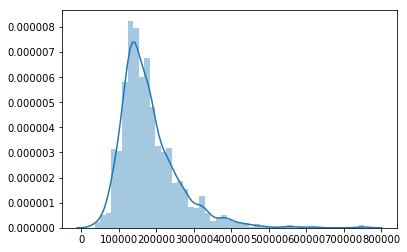

In [7]:
import seaborn as sns
#histogram
sns.distplot(resultCol);

*'Ah! I see you that you use seaborn makeup when you're going out... That's so elegant! I also see that you:*

* *<b>Deviate from the normal distribution.</b>*
* *<b>Have appreciable positive skewness.</b>*
* *<b>Show peakedness.</b>*

*This is getting interesting! 'SalePrice', could you give me your body measures?'*

In [8]:
#skewness and kurtosis
print("Skewness: %f" % resultCol.skew())
print("Kurtosis: %f" % resultCol.kurt())

Skewness: 1.882876
Kurtosis: 6.536282


## Relationship with numerical variables

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


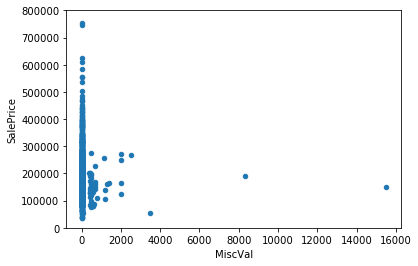

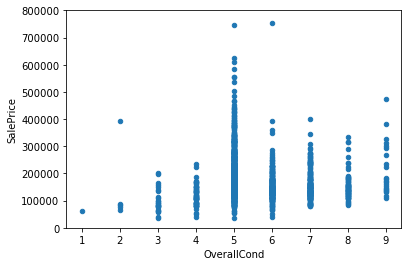

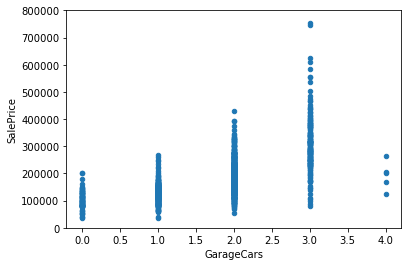

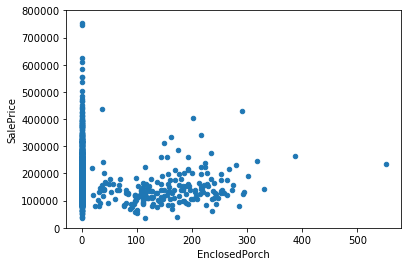

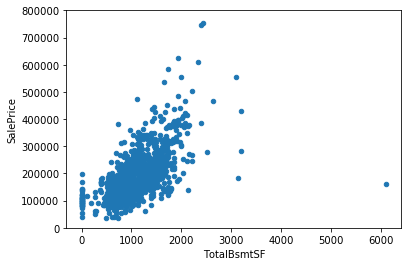

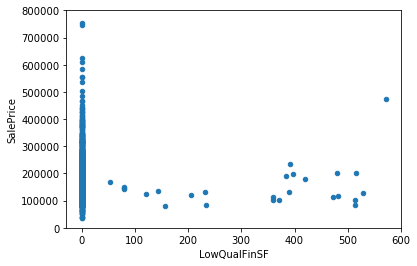

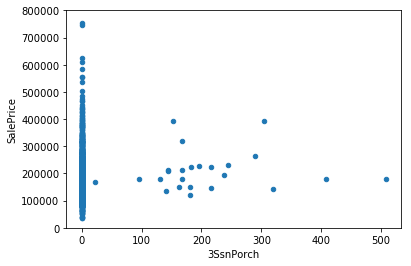

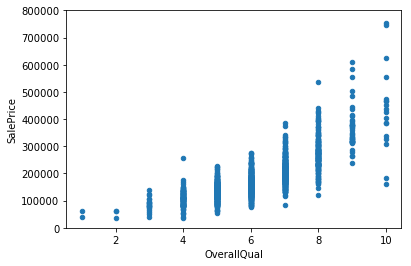

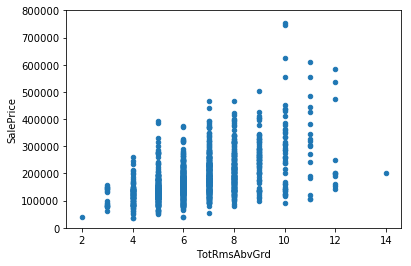

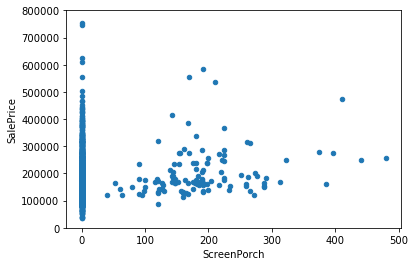

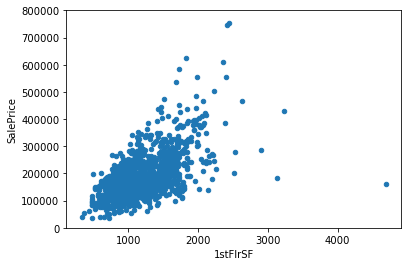

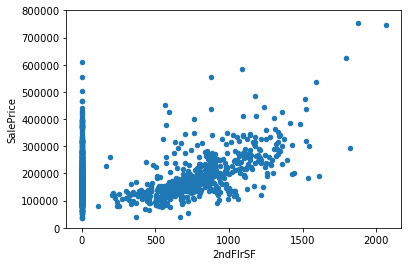

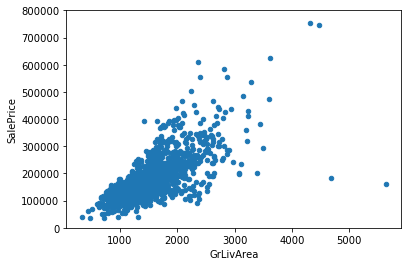

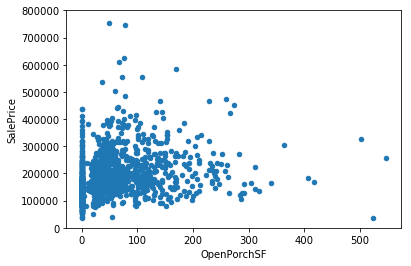

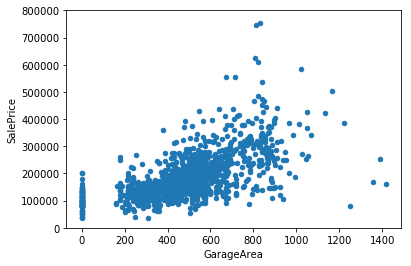

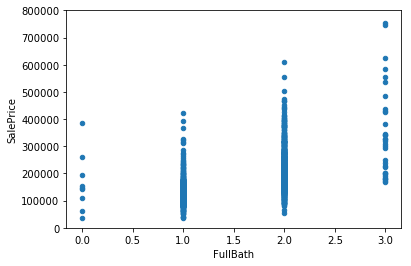

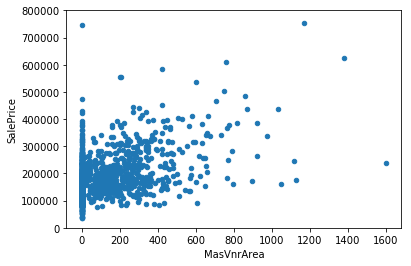

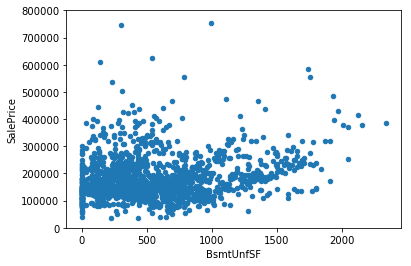

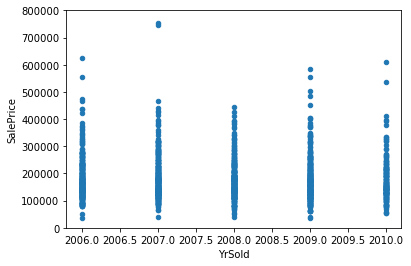

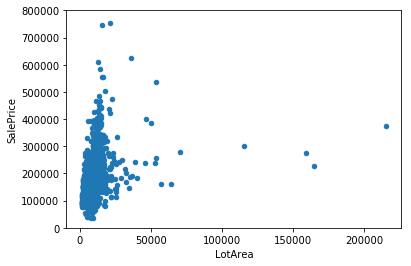

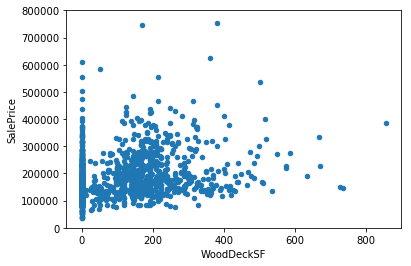

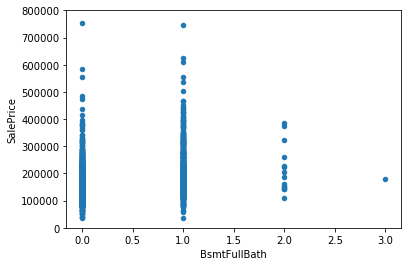

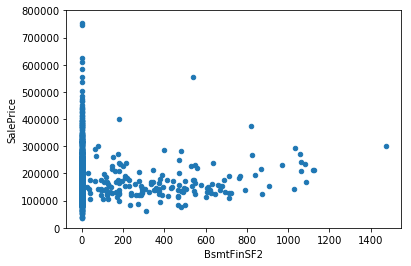

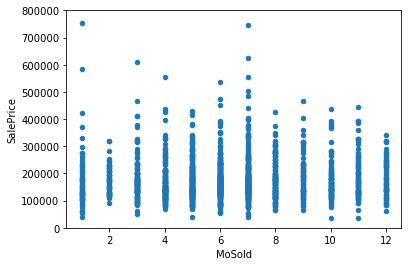

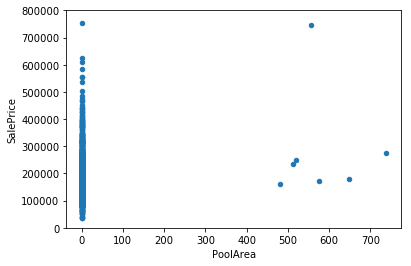

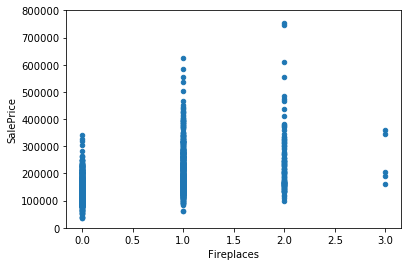

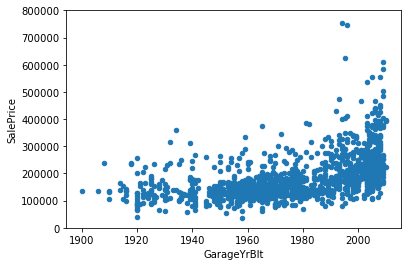

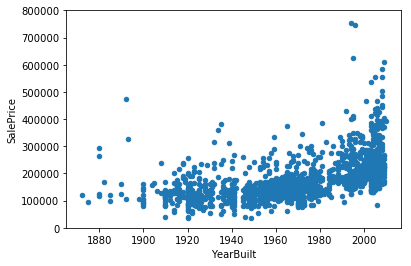

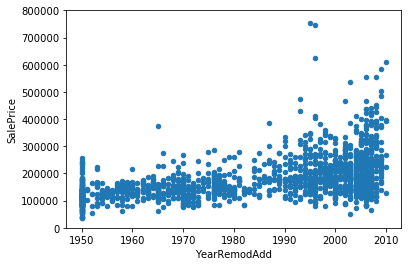

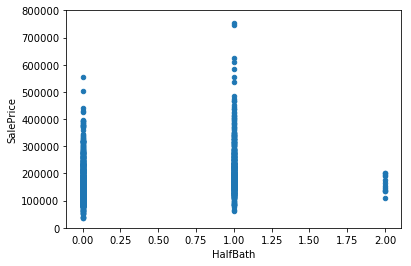

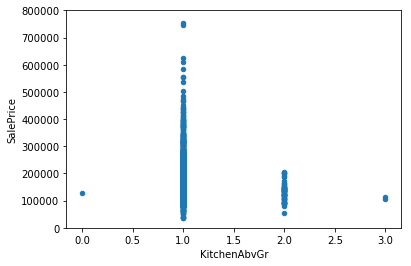

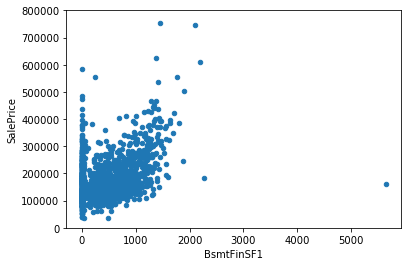

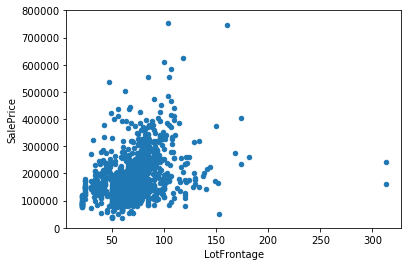

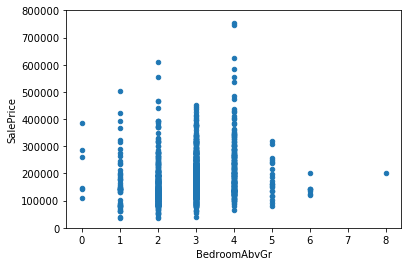

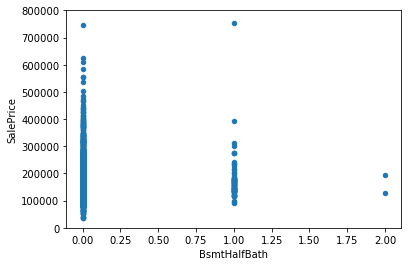

In [9]:
for continuesCol in continuesDF:
    tempCol = continuesDF[continuesCol]
    data = pd.concat([resultCol, tempCol], axis=1)
    data.plot.scatter(x=continuesCol, y='SalePrice', ylim=(0,800000));

# correlation matrix

<class 'pandas.core.frame.DataFrame'>
(36, 36)


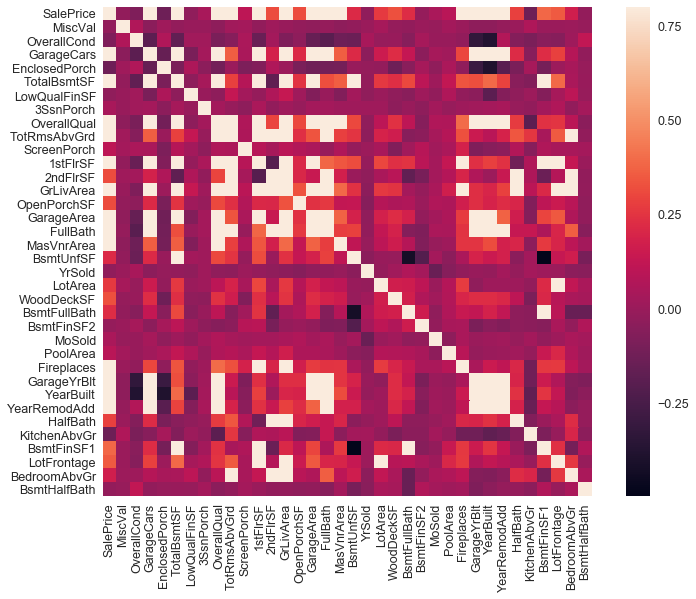

In [24]:

contAndResultDF = pd.concat([resultCol, continuesDF],axis=1)
corrmat = contAndResultDF.corr()
print(type(corrmat))
print(corrmat.shape)

corrmat1 = corrmat.copy()
corrmat1[corrmat1>0.4]=1
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat1, vmax=.8, square=True);

In my opinion, this heatmap is the best way to get a quick overview of our 'plasma soup' and its relationships. (Thank you @seaborn!)

At first sight, there are two red colored squares that get my attention. The first one refers to the 'TotalBsmtSF' and '1stFlrSF' variables, and the second one refers to the 'Garage*X*' variables. Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs. Heatmaps are great to detect this kind of situations and in problems dominated by feature selection, like ours, they are an essential tool.

Another thing that got my attention was the 'SalePrice' correlations. We can see our well-known 'GrLivArea', 'TotalBsmtSF', and 'OverallQual' saying a big 'Hi!', but we can also see many other variables that should be taken into account. That's what we will do next.

#### 'SalePrice' correlation matrix (zoomed heatmap style)

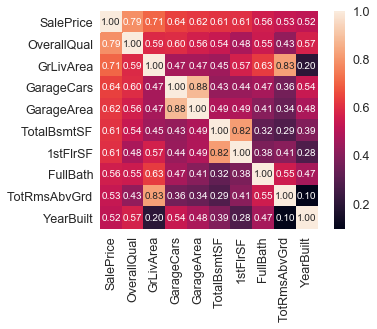

In [25]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(contAndResultDF[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Question: How to work with rows that have null values in some of the columns?

In [12]:
fine_columns = ['MoSold', 'GarageYrBlt', 'OverallQual', 'FullBath', 'GarageCars', 'YearBuilt', 'KitchenAbvGr',
               'BedroomAbvGr', 'YrSold', 'OverallCond', 'HalfBath', 'Fireplaces', 'BsmtFullBath', 'BsmtHalfBath',
               'GarageArea', 'TotRmsAbvGrd']

need_work_columns = list(set(listOFContinuesCols) - set(fine_columns))

In [13]:
print(need_work_columns) 

['WoodDeckSF', 'GrLivArea', 'OpenPorchSF', 'BsmtFinSF2', 'MiscVal', '1stFlrSF', 'EnclosedPorch', 'BsmtFinSF1', 'PoolArea', 'YearRemodAdd', 'TotalBsmtSF', 'LowQualFinSF', '3SsnPorch', 'MasVnrArea', 'BsmtUnfSF', 'LotFrontage', 'LotArea', 'ScreenPorch', '2ndFlrSF']
